In [1]:
import pickle
import pandas as pd

In [27]:
with open('results_TS_2.pkl', 'rb') as handle:
    res = pickle.load(handle)

In [29]:
res.arms[0].hb.evals.iloc[0,]

IndexError: single positional indexer is out-of-bounds

In [4]:
losses = res.evals.L

In [32]:
import seaborn as sns

[(0.75, 0.85)]

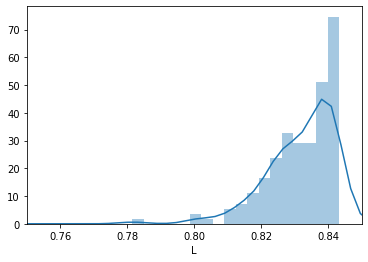

In [6]:
ax = sb.distplot(losses, bins=100)
ax.set(xlim=(0.75, 0.85))

In [7]:
etas = [x[-1] for x in res.evals.conf]

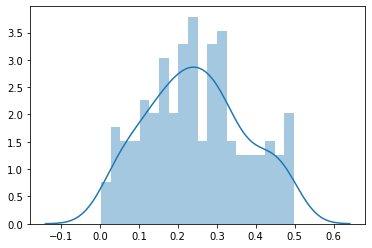

In [10]:
ax = sb.distplot(etas, bins = 20)

In [14]:
tab = res.evals
tab['s'] = 0
tab.reset_index(drop=True, inplace=True)
tab['s'] = (tab.index)%8

In [27]:
def mapping(x):
    if x>3:
        return 3
    elif x in [2,3]:
        return 2
    else:
        return x
    
def mapping2(x):
    if x:
        return '1st'
    elif x==1:
        return '2nd'
    elif x==2:
        return '3rd'
    else:
        return '4th'

In [28]:
tab.s = tab.s.apply(lambda x: mapping(x))
tab['eta'] = etas
tab = tab[tab.L>0.6]
tab.s = tab.s.apply(lambda x: mapping2(x))

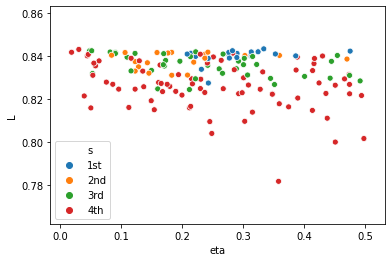

In [57]:
sns.scatterplot(tab.eta, tab.L, hue=(tab.s))

str

In [36]:
losses2 = res.evals[res.evals.etas < 0.01].L

/home/dine/Documents/environments/ML1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dine/Documents/environments/ML1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


[(0.75, 0.85)]

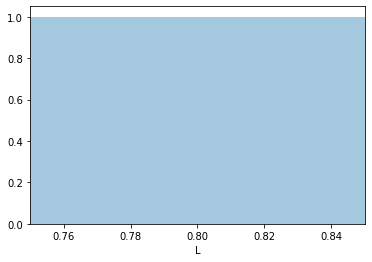

In [37]:
ax = sb.distplot(losses2)
ax.set(xlim=(0.75, 0.85))b

In [47]:
res.evals.L[0].describe()

count    80.000000
mean      0.834256
std       0.008566
min       0.799939
25%       0.831046
50%       0.837492
75%       0.840663
max       0.843323
Name: L, dtype: float64

In [49]:
res.evals.L[1].describe()

count    40.000000
mean      0.832780
std       0.009082
min       0.809463
25%       0.826691
50%       0.835674
75%       0.840058
max       0.843065
Name: L, dtype: float64

In [50]:
res.evals.L[2].describe()

count    20.000000
mean      0.809762
std       0.074009
min       0.500000
25%       0.821754
50%       0.826085
75%       0.834152
max       0.841741
Name: L, dtype: float64

In [51]:
res.evals.L[3].describe()

count    20.000000
mean      0.808378
std       0.073286
min       0.500000
25%       0.814901
50%       0.825708
75%       0.829493
max       0.840833
Name: L, dtype: float64

In [64]:
(pd.Series([x[-1] for x in res.evals.conf[0]]) < 0.1).mean()

0.0625

In [65]:
(pd.Series([x[-1] for x in res.evals.conf[1]]) < 0.1).mean()

0.175

In [66]:
(pd.Series([x[-1] for x in res.evals.conf[2]]) < 0.1).mean()

0.25

In [67]:
(pd.Series([x[-1] for x in res.evals.conf[2]]) < 0.1).mean()

0.25